### Title
**Wisconsin Diagnostic Breast Cancer (WDBC) Dataset**

### Feature Description
- **Source**: Digitized images from fine needle aspirates (FNA) of breast masses.
- **Features**: Describe properties of the cell nuclei in the images.
- **Ten basic real-valued features** are computed for each nucleus:
  - **Radius**: Mean of distances from center to points on the perimeter
  - **Texture**: Standard deviation of gray-scale values
  - **Perimeter**
  - **Area**
  - **Smoothness**: Local variation in radius lengths
  - **Compactness**: (Perimeter² / Area) - 1.0
  - **Concavity**: Severity of concave portions of the contour
  - **Concave points**: Number of concave portions of the contour
  - **Symmetry**
  - **Fractal dimension**: "Coastline approximation" - 1
  
- For each feature, three measurements are recorded:
  - **Mean**
  - **Standard Error (SE)**
  - **Worst** (largest mean of the three worst/largest values)
  
- This results in **30 real-valued input features** per sample.
- All feature values are recorded with four significant digits.

### Classification Target
- **Target**: Predict field 2, "Diagnosis"
  - **M** = Malignant
  - **B** = Benign
- **Key Notes**:
  - The dataset is linearly separable using all 30 features.
  - Best predictive accuracy (~97.5%) achieved using three features: Worst Area, Worst Smoothness, and Mean Texture.

### Basic Dataset Information
- **Number of instances**: 569
- **Number of attributes**: 32
  - 1 ID field
  - 1 Diagnosis label
  - 30 real-valued input features
- **Missing attribute values**: None
- **Class distribution**:
  - 357 benign
  - 212 malignant

### References
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names)


In [181]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Callable, Dict, List, Optional, Tuple


In [182]:
DATA_DIR = "data"
DATASET = "wdbc.csv"
DATASET_PATH = os.path.abspath(os.path.join('..', DATA_DIR, DATASET))

DATASET_PATH

'/workspace/data/wdbc.csv'

## Step 0: Load data and check basic information

In [183]:
feature_names = [
    'ID', 'Diagnosis',
    'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
    'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
    'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension'
]

In [184]:
df = pd.read_csv(DATASET_PATH, sep=",", header=None, names=feature_names)

df.head()


,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [185]:
df.describe()

,ID,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [186]:
print("Number of features:", len(df.columns[2:]))
print("Number of samples:", len(df))
print("Number of features with missing values:", df.isnull().sum().sum())
print("Number of samples with missing values:", df.isnull().any(axis=1).sum())

Number of features: 30
Number of samples: 569
Number of features with missing values: 0
Number of samples with missing values: 0


In [187]:
df.isnull().sum().sort_values(ascending=False)

ID                         0
Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64

Diagnosis
B    357
M    212
Name: count, dtype: int64


/tmp/ipykernel_124073/2415665842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='Set2')


<Axes: xlabel='Diagnosis', ylabel='count'>

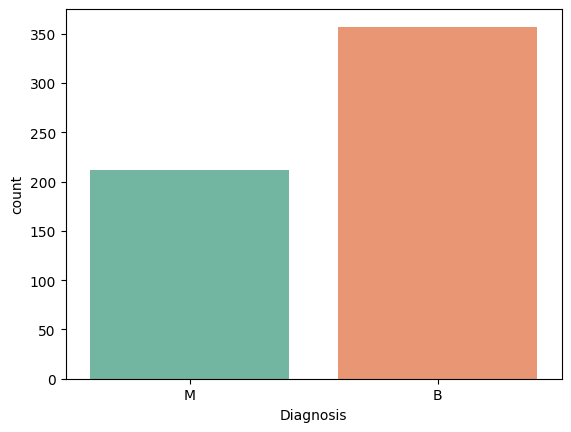

In [188]:
print(df['Diagnosis'].value_counts())
sns.countplot(x='Diagnosis', data=df, palette='Set2')

# Looks like quite balanced data

In [189]:
feature_data = df.drop(columns=['ID', 'Diagnosis'])
corr_matrix = feature_data.corr()

corr_matrix.head()

,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
Mean Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Mean Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
Mean Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
Mean Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
Mean Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


<Axes: >

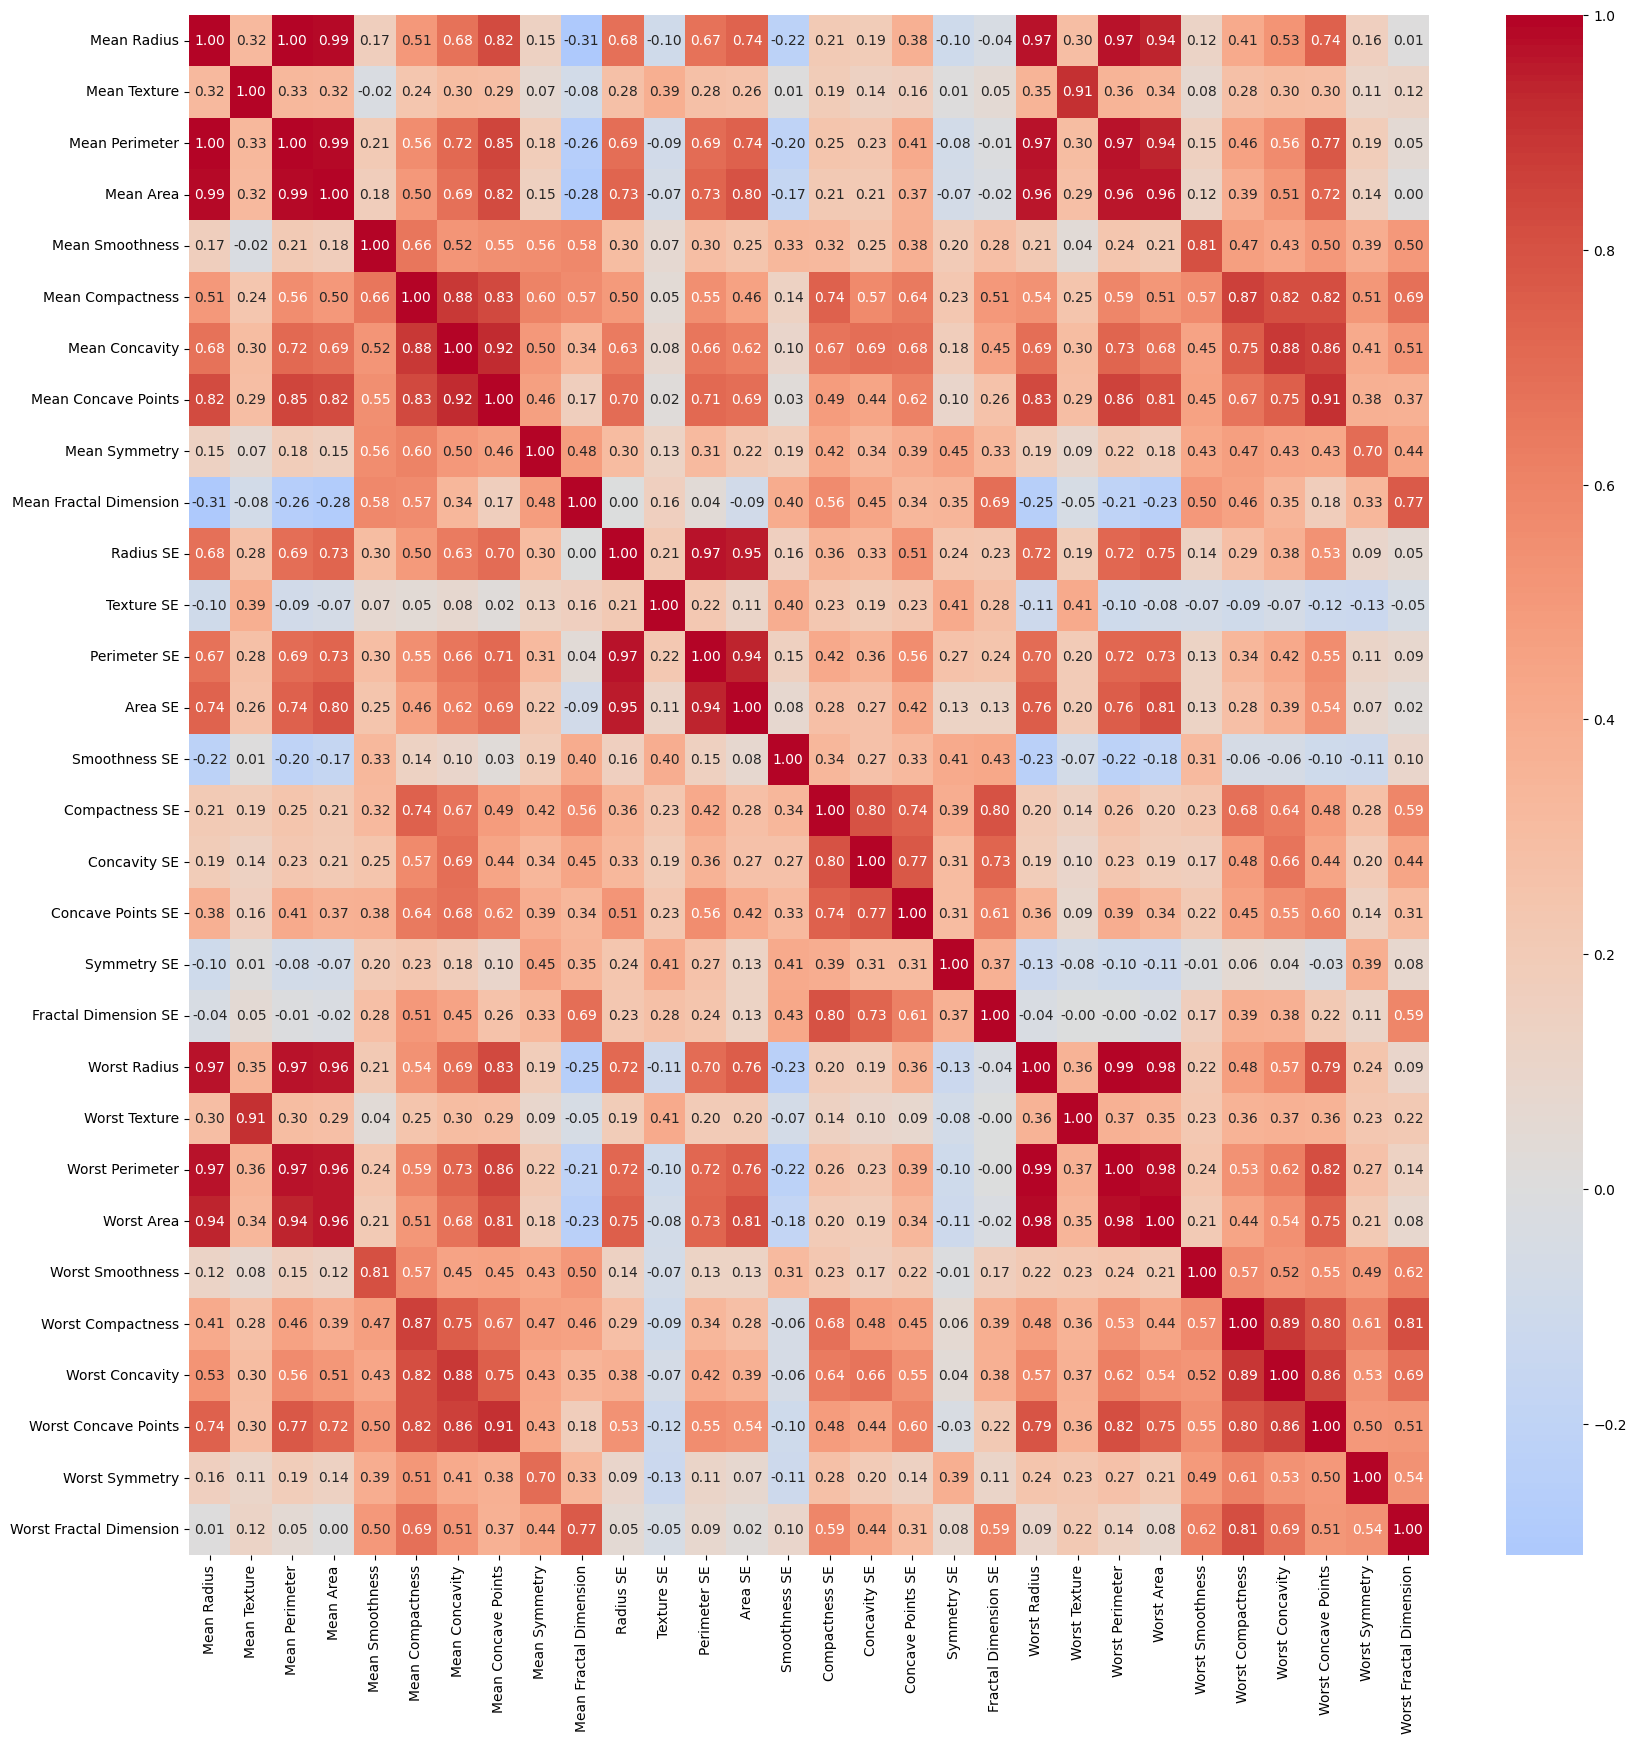

In [190]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)

In [191]:
high_corr_pairs = []

threshold = 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))


for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

print()
print("Number of highly correlated pairs:", len(high_corr_pairs))

Mean Perimeter and Mean Radius: correlation = 1.00
Mean Area and Mean Radius: correlation = 0.99
Mean Area and Mean Perimeter: correlation = 0.99
Mean Concave Points and Mean Concavity: correlation = 0.92
Perimeter SE and Radius SE: correlation = 0.97
Area SE and Radius SE: correlation = 0.95
Area SE and Perimeter SE: correlation = 0.94
Worst Radius and Mean Radius: correlation = 0.97
Worst Radius and Mean Perimeter: correlation = 0.97
Worst Radius and Mean Area: correlation = 0.96
Worst Texture and Mean Texture: correlation = 0.91
Worst Perimeter and Mean Radius: correlation = 0.97
Worst Perimeter and Mean Perimeter: correlation = 0.97
Worst Perimeter and Mean Area: correlation = 0.96
Worst Perimeter and Worst Radius: correlation = 0.99
Worst Area and Mean Radius: correlation = 0.94
Worst Area and Mean Perimeter: correlation = 0.94
Worst Area and Mean Area: correlation = 0.96
Worst Area and Worst Radius: correlation = 0.98
Worst Area and Worst Perimeter: correlation = 0.98
Worst Conca

In [192]:
# compare all the distribution of the features with subplots
def plot_feature_distribution(df, feature_names):
    fig, axes = plt.subplots(nrows=5, ncols=feature_names.shape[0] // 5, figsize=(20, 20))
    axes = axes.flatten()
    for i, feature in enumerate(feature_names):
        sns.histplot(df[feature], ax=axes[i], kde=True)
        axes[i].set_title(feature)
    plt.tight_layout()
    plt.show()

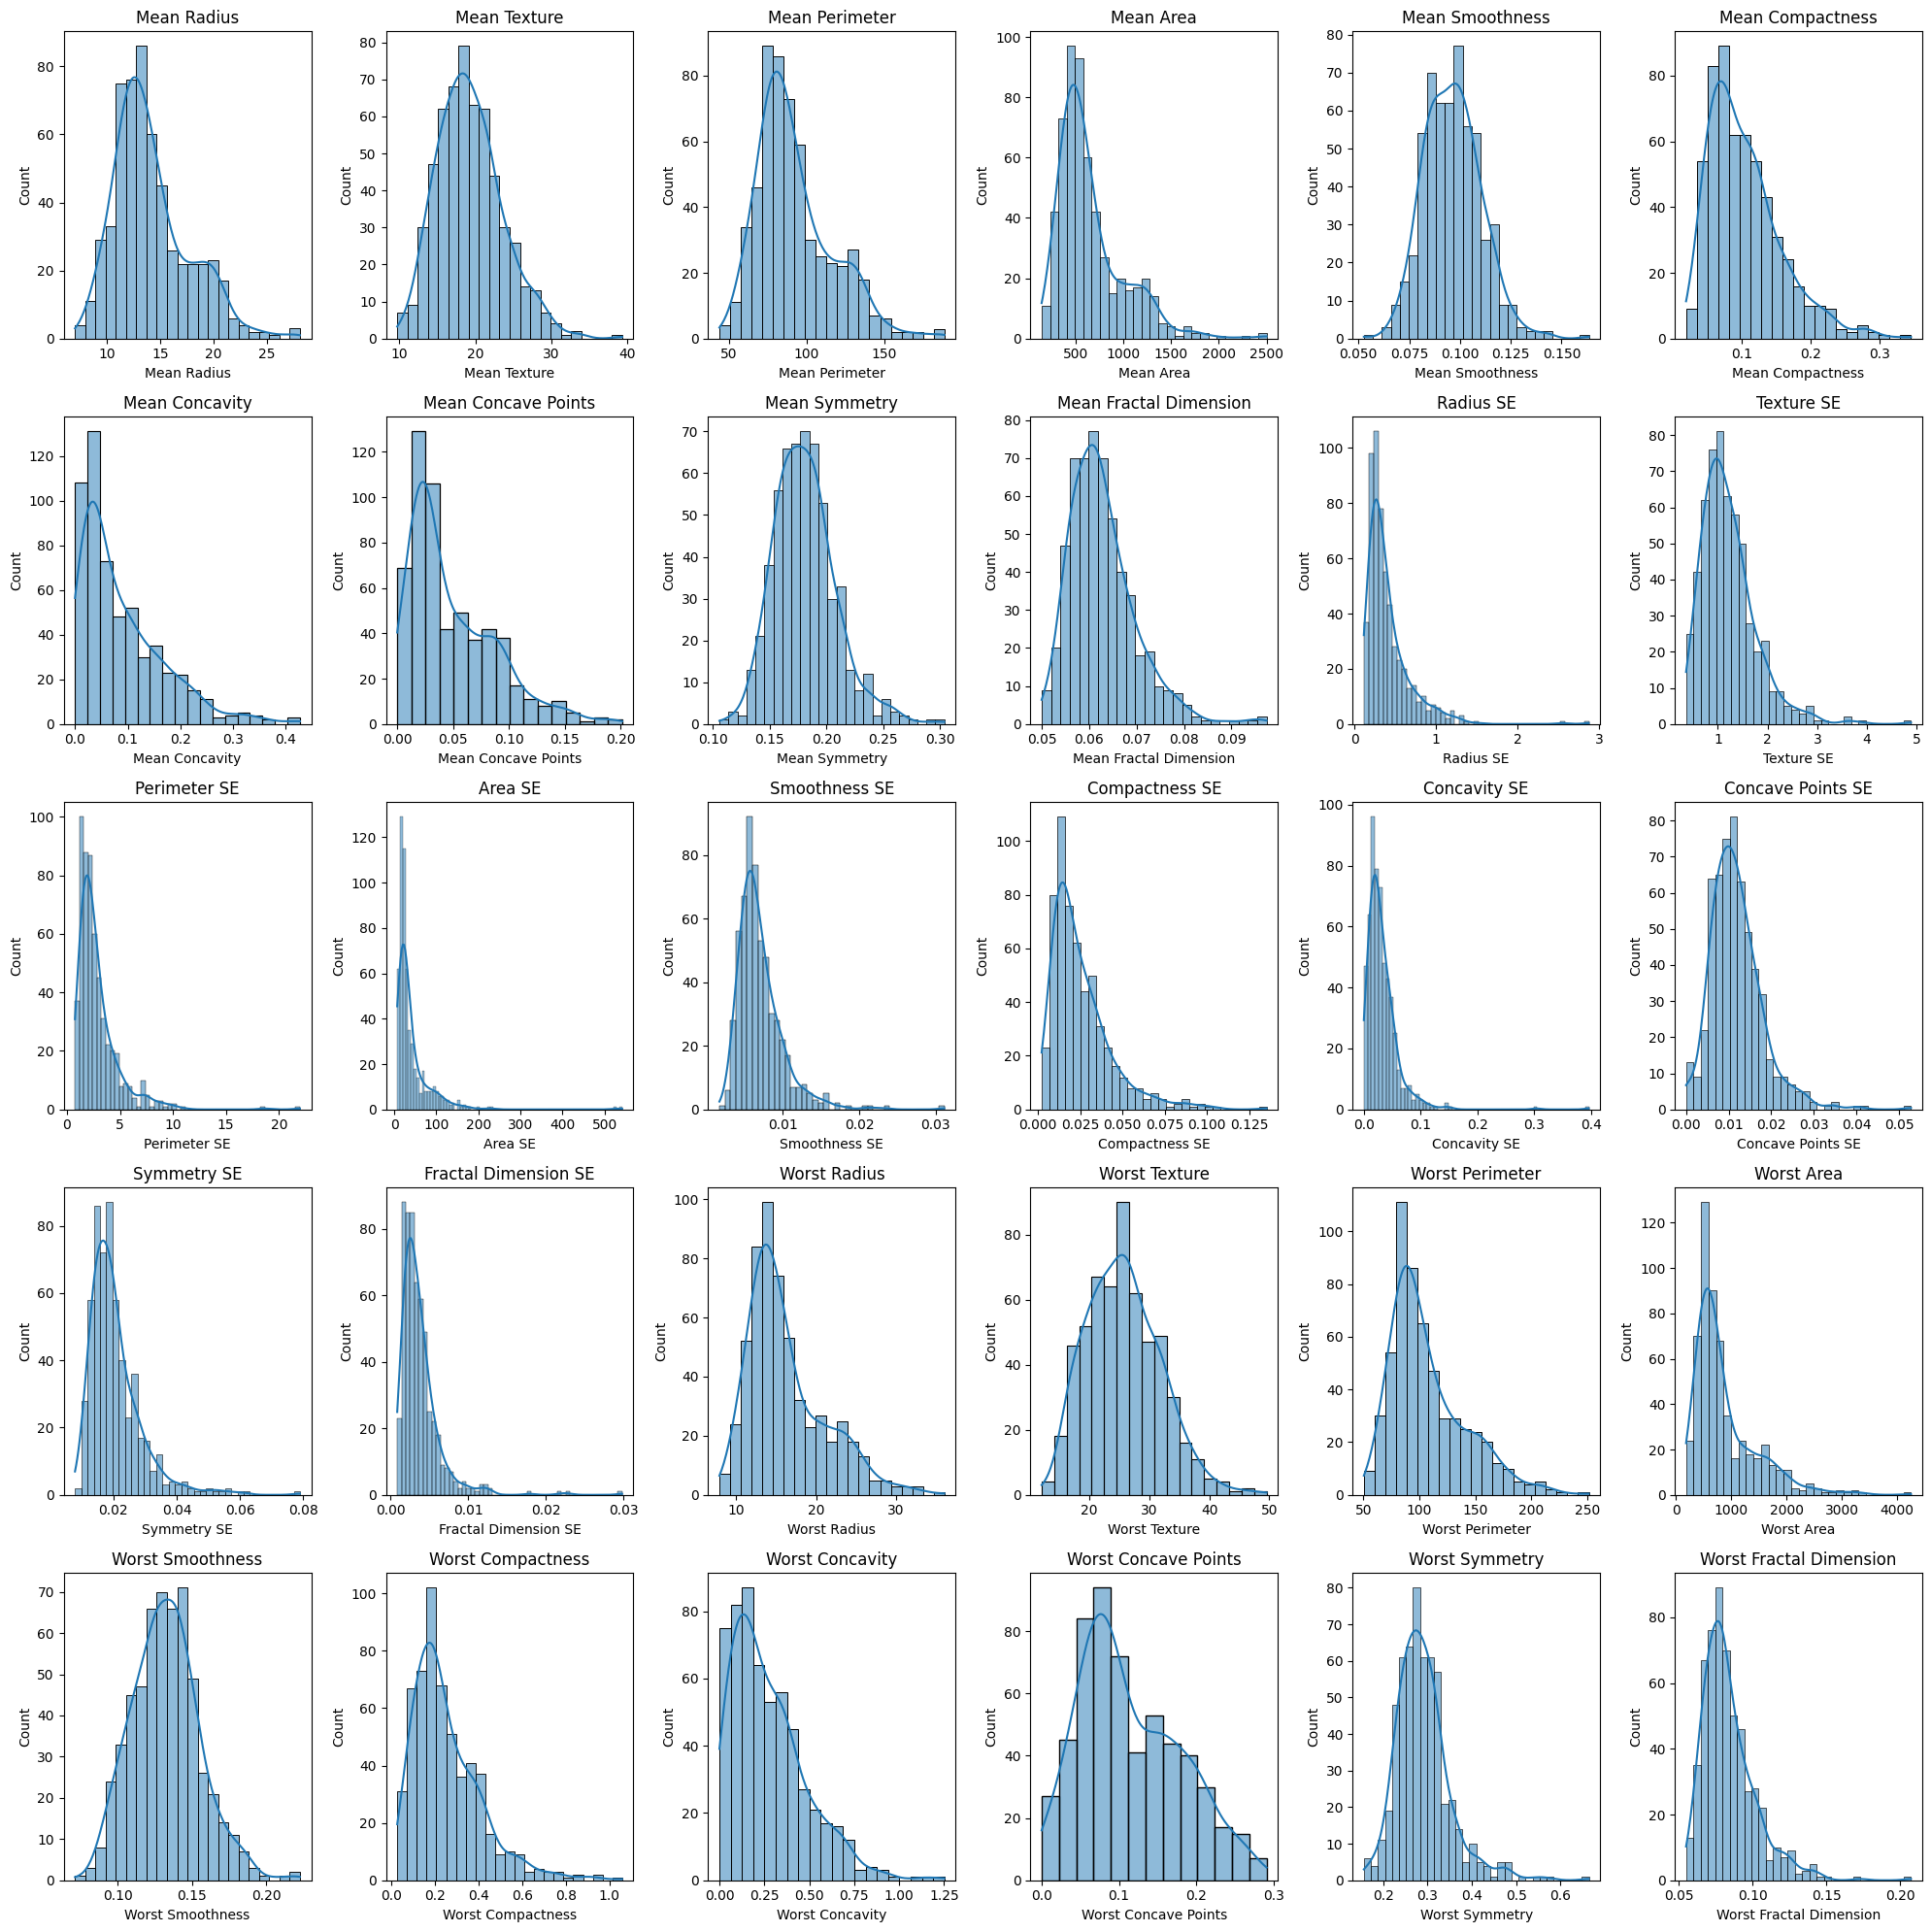

In [193]:
plot_feature_distribution(feature_data, feature_data.columns)

In [194]:
def prepare_data_for_training(df, normalize: Callable = None, split_ratio: float = 0.2, target_col: str = 'Diagnosis', feature_cols: list = None):
    # Check if the target column is converted or not
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in the DataFrame.")
    # Convert categorical labels to numerical values
    if df[target_col].dtype == 'object':
        if df[target_col].nunique() > 2:
            raise ValueError(f"Target column '{target_col}' has more than 2 unique values. Please provide a binary classification target.")
        # Map 'M' to 1 and 'B' to 0
        print(f"Mapping {df[target_col].unique()} to 1 and 0")
        # Check if the mapping is correct
        if not all(x in ['M', 'B'] for x in df[target_col].unique()):
            raise ValueError(f"Target column '{target_col}' contains values other than 'M' and 'B'.")

    print(f"df[{target_col}].value_counts(): ", df[target_col].value_counts())
    # Split the data into features and target
    if feature_cols:
        X = df[feature_cols]
    else:
        X = df.drop(columns=[target_col])
    y = df[target_col]
    # Normalize the features if a normalization function is provided
    if normalize:
        X = normalize(X)
    return X, y

## Step 1: Get brenchmark baseline

Without any preprocessing, we can get a benchmark baseline for the dataset. We will use the `LogisticRegression` model from `sklearn` to get a baseline accuracy score.

In [195]:
# k-fold cross-validation
from sklearn.model_selection import KFold

In [196]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

def normalize_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return pd.DataFrame(X_scaled, columns=X.columns)

# Use k-fold cross-validation to evaluate the model
def evaluate_model_with_kfold(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return np.mean(accuracies), np.std(accuracies)

model = LogisticRegression(max_iter=1000)
X, y = prepare_data_for_training(df.copy(), normalize=normalize_data)
mean_accuracy, std_accuracy = evaluate_model_with_kfold(model, X, y)
print(f"Mean accuracy: {mean_accuracy} ± {std_accuracy:.2f}")

baseline_accuracy = mean_accuracy

Mapping ['M' 'B'] to 1 and 0
df[Diagnosis].value_counts():  Diagnosis
B    357
M    212
Name: count, dtype: int64
Mean accuracy: 0.9753609687936656 ± 0.01


## Step 1: Preprocess the data
- Remove the ID column
- Handle missing values (if any)
- Handle outliers (if any)
- Normalize the feature values
- Reduce the dimensionality of the dataset 
  - Use PCA or t-SNE for visualization
- Convert the diagnosis column to binary values (0 for benign, 1 for malignant)

In [197]:
from sklearn.manifold import TSNE

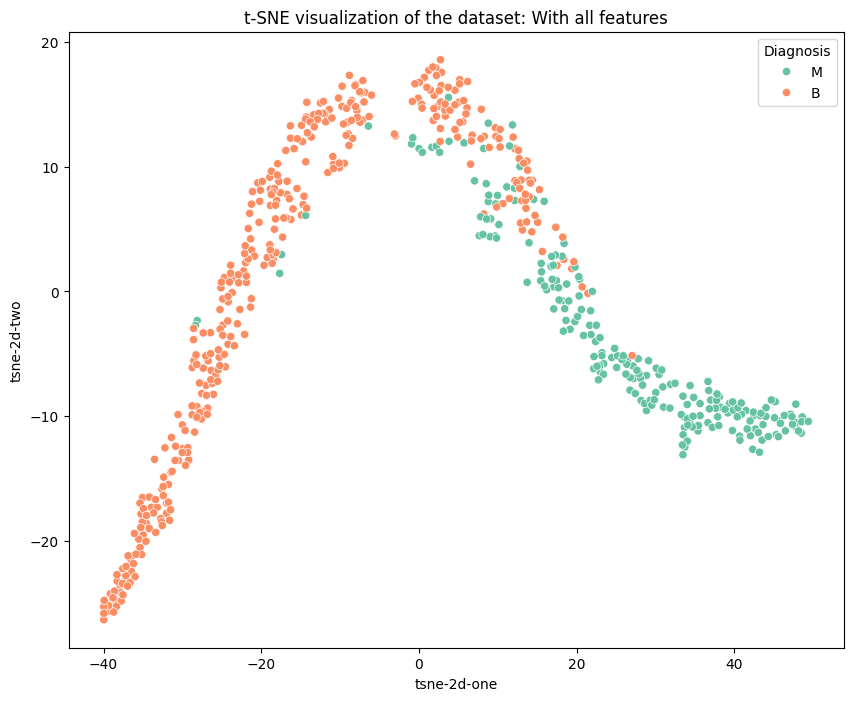

In [198]:
# Visualize the data in 2D using t-SNE
def plot_tsne(df, feature_names, data_name=None):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(df[feature_names])
    df['tsne-2d-one'] = tsne_results[:, 0]
    df['tsne-2d-two'] = tsne_results[:, 1]

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='Diagnosis', data=df, palette='Set2')
    plt.title('t-SNE visualization of the dataset: {}'.format(data_name if data_name else ''))
    plt.show()

plot_tsne(df, feature_names[2:], data_name="With all features")

In [199]:
# how many features are left after removing highly correlated features
def remove_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr()
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                to_drop.add(colname2)
    return df.drop(columns=to_drop), to_drop

reduced_data, dropped_features = remove_highly_correlated_features(feature_data, threshold=0.9)
print("Number of features after removing highly correlated features:", len(reduced_data.columns))
print("Dropped features:", dropped_features)

Number of features after removing highly correlated features: 20
Dropped features: {'Mean Perimeter', 'Worst Radius', 'Perimeter SE', 'Worst Perimeter', 'Mean Texture', 'Mean Concave Points', 'Radius SE', 'Mean Concavity', 'Mean Radius', 'Mean Area'}


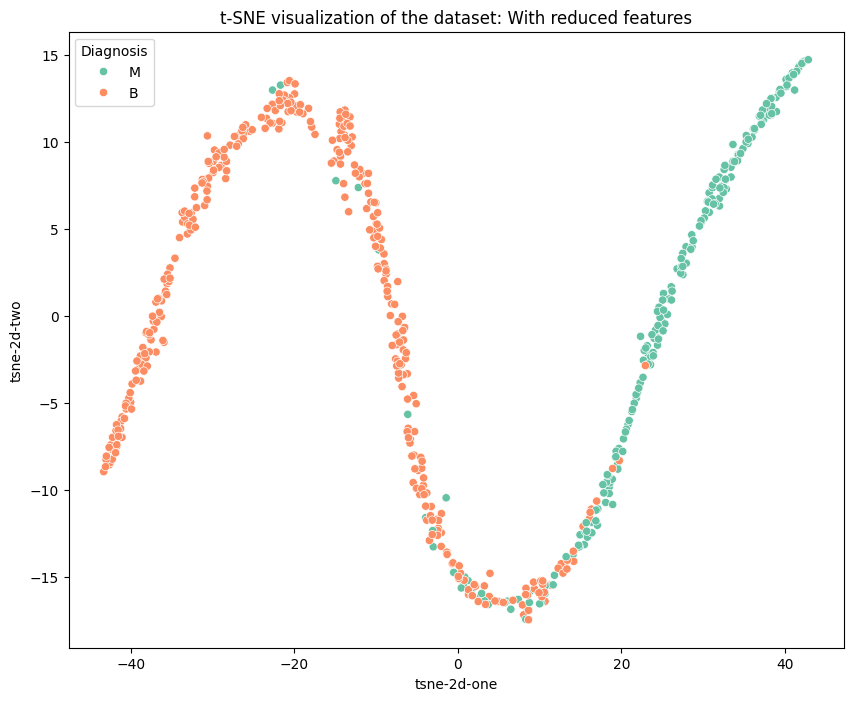

In [200]:
plot_tsne(df, list(reduced_data.columns), data_name="With reduced features")

In [201]:
from sklearn.decomposition import PCA

In [202]:
pca = PCA(n_components=20)
pca_df = pd.DataFrame(pca.fit_transform(feature_data), columns=[f'PC{i+1}' for i in range(20)])
pca_df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

pca_df['Diagnosis'].value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

In [203]:
import torch
import torch.nn as nn

In [204]:
X, y= prepare_data_for_training(pca_df, normalize=normalize_data)

df[Diagnosis].value_counts():  Diagnosis
0    357
1    212
Name: count, dtype: int64


In [205]:
y.any()

np.True_

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [208]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [218]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [219]:

epochs = 200

for epoch in range(epochs):
    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            y_pred_label = (y_pred > 0.5).float()
            acc = (y_pred_label == y_train).float().mean()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Train Accuracy: {acc.item():.4f}")

Epoch [10/200], Loss: 0.6897, Train Accuracy: 0.4681
Epoch [20/200], Loss: 0.6725, Train Accuracy: 0.6857
Epoch [30/200], Loss: 0.6553, Train Accuracy: 0.7912
Epoch [40/200], Loss: 0.6362, Train Accuracy: 0.8242
Epoch [50/200], Loss: 0.6130, Train Accuracy: 0.8527
Epoch [60/200], Loss: 0.5848, Train Accuracy: 0.8835
Epoch [70/200], Loss: 0.5514, Train Accuracy: 0.9143
Epoch [80/200], Loss: 0.5127, Train Accuracy: 0.9143
Epoch [90/200], Loss: 0.4701, Train Accuracy: 0.9253
Epoch [100/200], Loss: 0.4255, Train Accuracy: 0.9385
Epoch [110/200], Loss: 0.3810, Train Accuracy: 0.9429
Epoch [120/200], Loss: 0.3378, Train Accuracy: 0.9538
Epoch [130/200], Loss: 0.2971, Train Accuracy: 0.9648
Epoch [140/200], Loss: 0.2604, Train Accuracy: 0.9714
Epoch [150/200], Loss: 0.2280, Train Accuracy: 0.9758
Epoch [160/200], Loss: 0.1995, Train Accuracy: 0.9780
Epoch [170/200], Loss: 0.1746, Train Accuracy: 0.9780
Epoch [180/200], Loss: 0.1536, Train Accuracy: 0.9824
Epoch [190/200], Loss: 0.1358, Train 

In [220]:
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred_label = (y_test_pred > 0.5).float()
    test_acc = (y_test_pred_label == y_test).float().mean()

print(f"Test Accuracy: {test_acc.item()}")

Test Accuracy: 0.9298245906829834


# ✅ Model Evaluation Summary

- **Model Type**: Multi-Layer Perceptron (Neural Network, MLP)
- **Dataset**: Wisconsin Diagnostic Breast Cancer (WDBC)
- **Dimensionality Reduction**: PCA (Principal Component Analysis) to retain major information
- **Training Accuracy**: Reached up to **98.46%**
- **Test Accuracy**: **92.98%**

---

## 🧠 Conclusion & Analysis

- The model performed excellently on the training set, showing strong learning capability.
- Test accuracy of **92.98%** indicates decent generalization, though slightly lower than training performance — suggesting **mild overfitting**.
- Compared to models like Logistic Regression, the neural network **did not significantly outperform**, which aligns with the nature of the dataset: **linearly separable and relatively small sample size**.

---

## 📌 Nexts

To improve test performance, consider the following strategies:
- Apply regularization techniques such as **Dropout** and **Weight Decay**
- Simplify the network architecture (fewer layers or neurons)
- Implement **Early Stopping** to monitor validation loss

